✅ Random Forest model trained successfully!

MODEL PERFORMANCE EVALUATION

📋 Classification Report:
              precision    recall  f1-score   support

 Not At Risk       0.97      0.79      0.87    171551
     At Risk       0.39      0.83      0.53     28449

    accuracy                           0.79    200000
   macro avg       0.68      0.81      0.70    200000
weighted avg       0.88      0.79      0.82    200000


CONFUSION MATRIX ANALYSIS
Confusion Matrix:
[[134772  36779]
 [  4844  23605]]

Confusion Matrix Details:
True Negatives (TN):  134772 - Correctly predicted Not At Risk
False Positives (FP): 36779 - Incorrectly predicted as At Risk
False Negatives (FN): 4844 - Missed At Risk students
True Positives (TP):  23605 - Correctly predicted At Risk
Specificity: 0.7856 - Ability to correctly identify Not At Risk
False Positive Rate: 0.2144


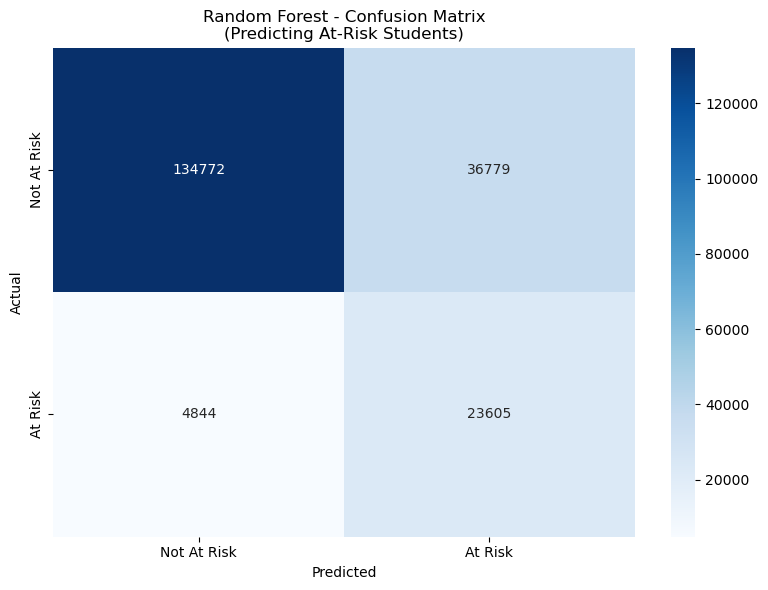


ROC CURVE ANALYSIS


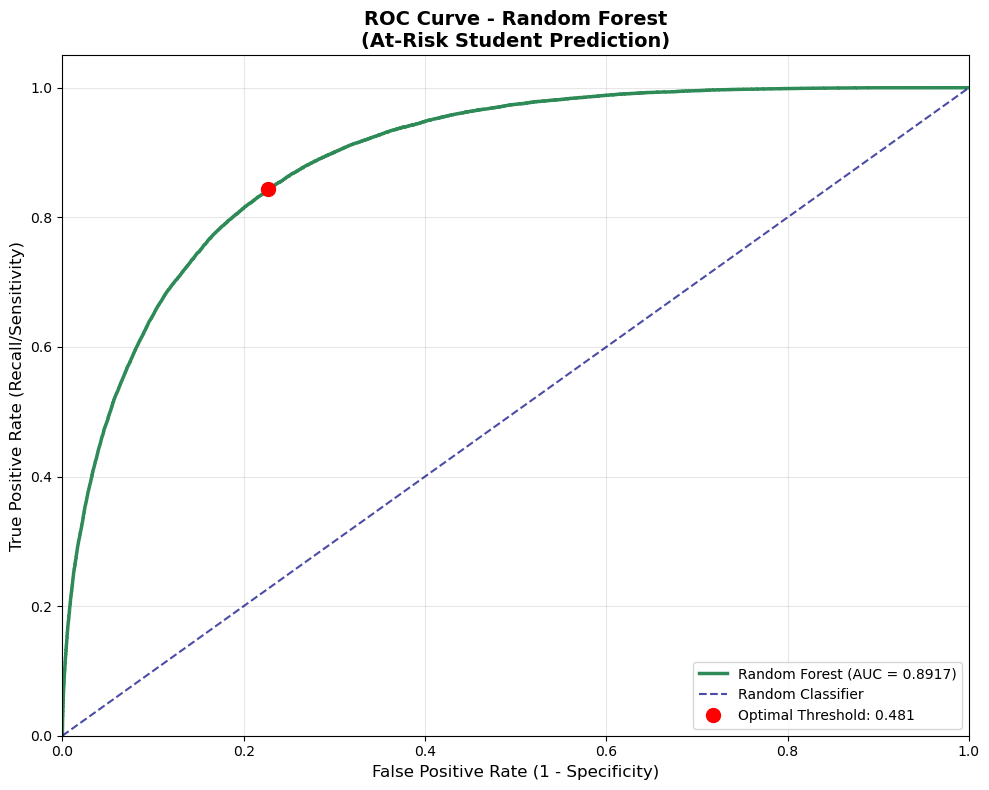

Optimal Threshold: 0.4815
This threshold maximizes the difference between True Positive Rate and False Positive Rate

COMPREHENSIVE PERFORMANCE SUMMARY
              Metric    Value                            Interpretation
            Accuracy 0.791885        Overall correctness of predictions
           Precision 0.390915          Accuracy when predicting At-Risk
Recall (Sensitivity) 0.829730      Ability to find all At-Risk students
         Specificity 0.785609 Ability to correctly identify Not At-Risk
            F1-Score 0.531447      Balance between Precision and Recall
       ROC-AUC Score 0.891689         Overall classification capability
 False Positive Rate 0.214391                      Rate of false alarms

RANDOM FOREST EVALUATION COMPLETE!
EXCELLENT: Model shows strong predictive power!

Key Insights:
• Model can distinguish At-Risk students with 89.2% accuracy
• Correctly identifies 83.0% of actual At-Risk students
• When predicting At-Risk, 39.1% of predictions are corr

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the encoded data
df = pd.read_csv("data/studentdata_encoded.csv")

# Create binary target - Struggling_Learner = At Risk
df['Target'] = (df['PerformanceCategory_Encoded'] == 2).astype(int)

# Remove the original multi-class target since we're using binary target
df = df.drop('PerformanceCategory_Encoded', axis=1)

# Prepare features (X) and target (y)
X = df.drop('Target', axis=1)
y = df['Target']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced'
)

# Train the model
rf_model.fit(X_train, y_train)
print("✅ Random Forest model trained successfully!")

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# MODEL PERFORMANCE EVALUATION
print("\n" + "="*50)
print("MODEL PERFORMANCE EVALUATION")
print("="*50)

# Calculate all performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not At Risk', 'At Risk']))

# CONFUSION MATRIX ANALYSIS
print("\n" + "="*40)
print("CONFUSION MATRIX ANALYSIS")
print("="*40)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate confusion matrix metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0

print(f"\nConfusion Matrix Details:")
print(f"True Negatives (TN):  {tn} - Correctly predicted Not At Risk")
print(f"False Positives (FP): {fp} - Incorrectly predicted as At Risk")
print(f"False Negatives (FN): {fn} - Missed At Risk students")
print(f"True Positives (TP):  {tp} - Correctly predicted At Risk")
print(f"Specificity: {specificity:.4f} - Ability to correctly identify Not At Risk")
print(f"False Positive Rate: {false_positive_rate:.4f}")

# CONFUSION MATRIX DIAGRAM
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not At Risk', 'At Risk'],
            yticklabels=['Not At Risk', 'At Risk'])
plt.title('Random Forest - Confusion Matrix\n(Predicting At-Risk Students)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# ROC CURVE ANALYSIS
print("\n" + "="*40)
print("ROC CURVE ANALYSIS")
print("="*40)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='#2E8B57', linewidth=2.5, label=f'Random Forest (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', alpha=0.7, label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Recall/Sensitivity)', fontsize=12)
plt.title('ROC Curve - Random Forest\n(At-Risk Student Prediction)', 
          fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# Add optimal threshold point
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=10, 
         label=f'Optimal Threshold: {optimal_threshold:.3f}')

plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print("This threshold maximizes the difference between True Positive Rate and False Positive Rate")

# COMPREHENSIVE PERFORMANCE SUMMARY
print("\n" + "="*50)
print("COMPREHENSIVE PERFORMANCE SUMMARY")
print("="*50)

# Create a summary dataframe
performance_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall (Sensitivity)', 'Specificity', 
               'F1-Score', 'ROC-AUC Score', 'False Positive Rate'],
    'Value': [accuracy, precision, recall, specificity, f1, roc_auc, false_positive_rate],
    'Interpretation': [
        'Overall correctness of predictions',
        'Accuracy when predicting At-Risk',
        'Ability to find all At-Risk students',
        'Ability to correctly identify Not At-Risk',
        'Balance between Precision and Recall',
        'Overall classification capability',
        'Rate of false alarms'
    ]
})

print(performance_summary.to_string(index=False))

# FINAL ASSESSMENT
print("\n" + "="*60)
print("RANDOM FOREST EVALUATION COMPLETE!")
print("="*60)

if roc_auc > 0.8:
    print("EXCELLENT: Model shows strong predictive power!")
elif roc_auc > 0.7:
    print("GOOD: Model has decent predictive ability")
elif roc_auc > 0.6:
    print("FAIR: Model has some predictive power")
else:
    print("NEEDS IMPROVEMENT: Consider feature engineering or different algorithm")

print(f"\nKey Insights:")
print(f"• Model can distinguish At-Risk students with {roc_auc:.1%} accuracy")
print(f"• Correctly identifies {recall:.1%} of actual At-Risk students")
print(f"• When predicting At-Risk, {precision:.1%} of predictions are correct")